<a href="https://colab.research.google.com/github/ekkune/projects/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
import numpy as np


In [7]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X['alcohol_to_acidity'] = X['alcohol'] / (X['malic_acid'] + 1e-6)  # Отношение алкоголя к кислотности
X['phenol_ratio'] = X['total_phenols'] / (X['flavanoids'] + 1e-6)  # Отношение фенолов к флавоноидам

X['proline_bin'] = pd.qcut(X['proline'], q=4, labels=False)
X = X.astype(float)

if X.isnull().any().any():
    raise ValueError("Обнаружены NaN в данных!")
if np.isinf(X).any().any():
    raise ValueError("Обнаружены бесконечные значения в данных!")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Определяем модели и параметры для GridSearchCV
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5]}
param_grid_xgb = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1]}

# GridSearchCV для Random Forest
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# GridSearchCV для XGBoost
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

# Ансамбль
ensemble = VotingClassifier(estimators=[
    ('rf', grid_rf.best_estimator_),
    ('xgb', grid_xgb.best_estimator_)
], voting='soft')
ensemble.fit(X_train, y_train)

# Словарь для результатов
models = {'Random Forest': grid_rf.best_estimator_, 'XGBoost': grid_xgb.best_estimator_, 'Ensemble': ensemble}
results = {}


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:27] WARNING: /w


Модель: Random Forest
Лучшие параметры: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Точность: 1.00
Кросс-валидация: 0.97 (+/- 0.04)
Отчет классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



<Figure size 1000x800 with 0 Axes>

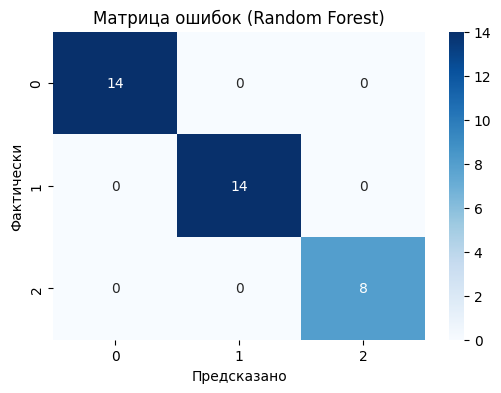

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:49] WARNING: /w


Модель: XGBoost
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Точность: 0.97
Кросс-валидация: 0.95 (+/- 0.06)
Отчет классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



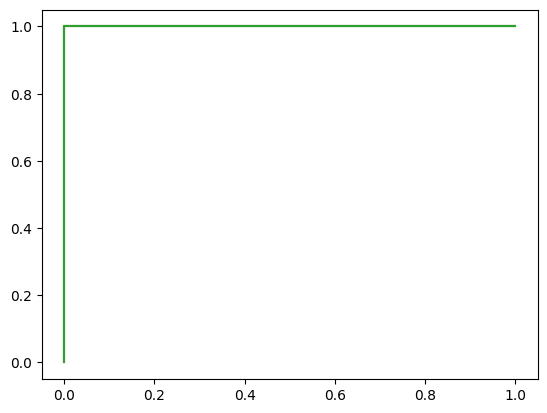

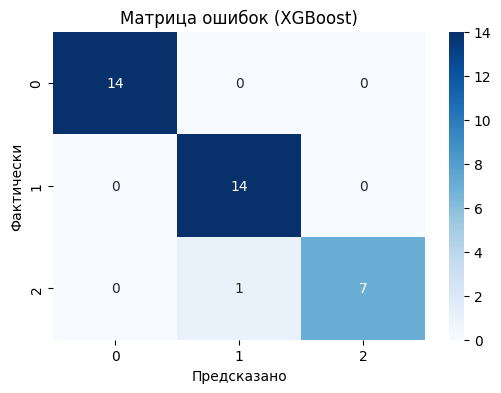

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:08:50] WARNING: /w


Модель: Ensemble
Лучшие параметры: N/A
Точность: 0.97
Кросс-валидация: 0.96 (+/- 0.07)
Отчет классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



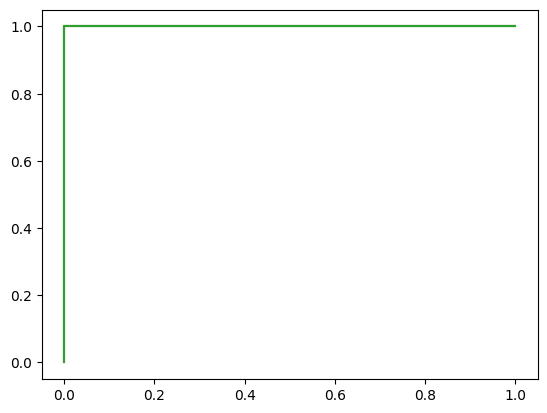

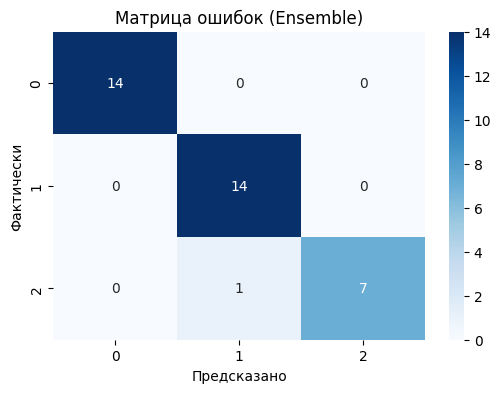

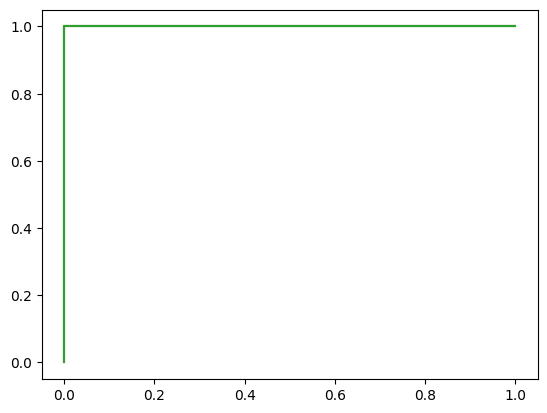

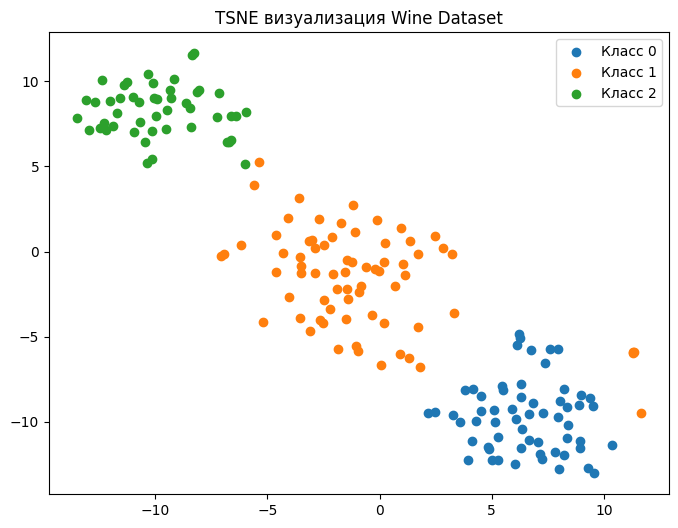

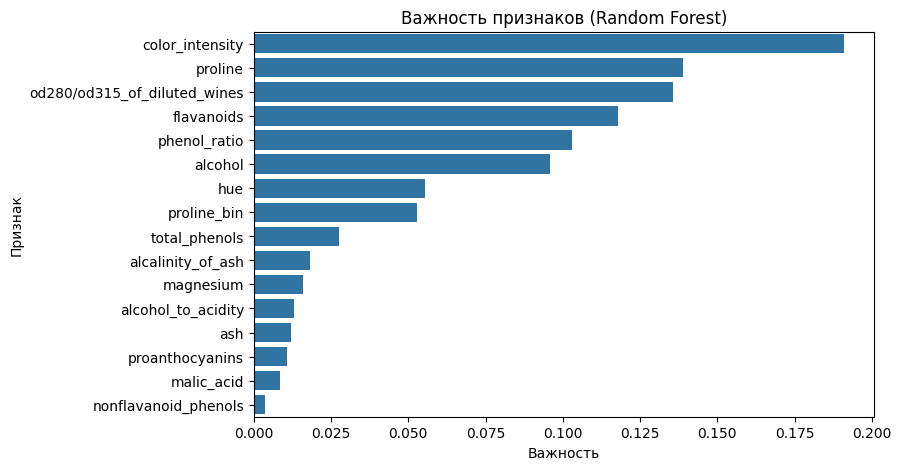

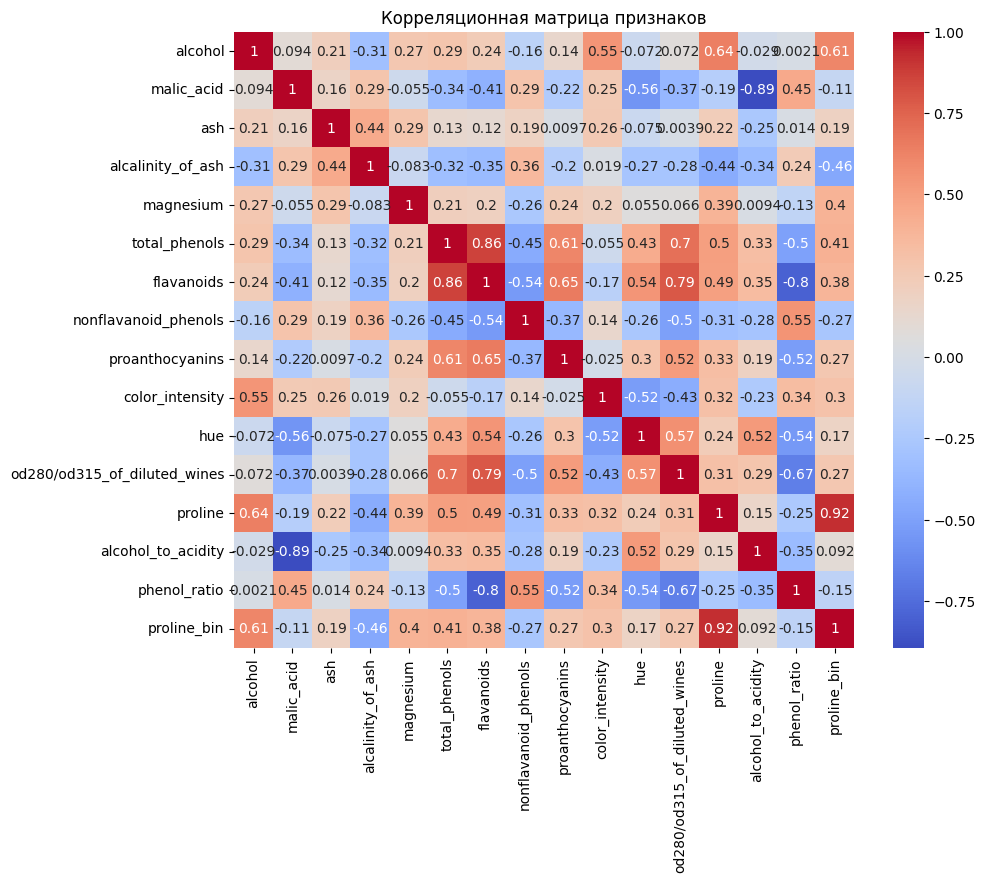

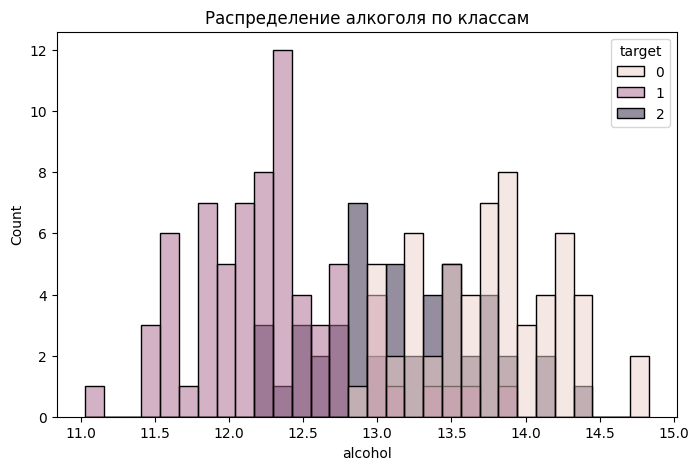

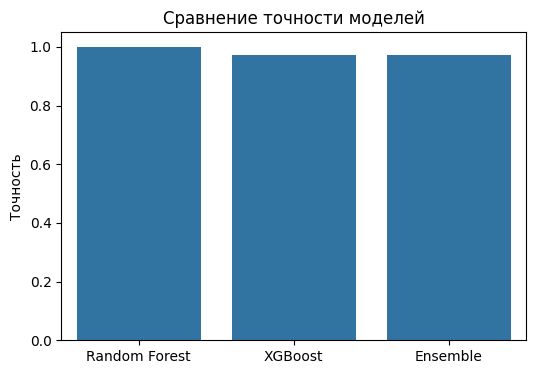

In [9]:

plt.figure(figsize=(10, 8))
for name, model in models.items():
    # Предсказания
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)
    results[name] = accuracy

    print(f'\nМодель: {name}')
    print(f'Лучшие параметры: {grid_rf.best_params_ if name == "Random Forest" else grid_xgb.best_params_ if name == "XGBoost" else "N/A"}')
    print(f'Точность: {accuracy:.2f}')
    print(f'Кросс-валидация: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})')
    print('Отчет классификации:')
    print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Матрица ошибок ({name})')
    plt.xlabel('Предсказано')
    plt.ylabel('Фактически')
    plt.show()

    # ROC-кривая для каждого класса (one-vs-rest)
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name}, класс {i} (AUC = {roc_auc:.2f})')


# Визуализация TSNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=f'Класс {i}')
plt.title('TSNE визуализация Wine Dataset')
plt.legend()
plt.show()

feature_names = data.feature_names + ['alcohol_to_acidity', 'phenol_ratio', 'proline_bin']
feature_importance = pd.DataFrame({
    'Признак': feature_names,
    'Важность': grid_rf.best_estimator_.feature_importances_
})
plt.figure(figsize=(8, 5))
sns.barplot(x='Важность', y='Признак', data=feature_importance.sort_values(by='Важность', ascending=False))
plt.title('Важность признаков (Random Forest)')
plt.show()

# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data=X.assign(target=y), x='alcohol', hue='target', bins=30)
plt.title('Распределение алкоголя по классам')
plt.show()

# Сравнение точности моделей
plt.figure(figsize=(6, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Сравнение точности моделей')
plt.ylabel('Точность')
plt.show()